## Task 1: Exploratory Data Analysis (EDA) of Financial News

This notebook performs Task 1 of the project:
- Descriptive statistics of news headlines
- Text preprocessing and cleaning
- Time series analysis of news publication
- Publisher analysis


In [2]:
import sys
from pathlib import Path

# Add project root and src/ folder to Python path
project_root = Path("..").resolve()
src_path = project_root / "src"

sys.path.append(str(project_root))
sys.path.append(str(src_path))

print("Project root:", project_root)
print("SRC path:", src_path)

Project root: D:\10Acadamy\Week 1\Task\Predicting-Price-Moves-with-News-Sentiment
SRC path: D:\10Acadamy\Week 1\Task\Predicting-Price-Moves-with-News-Sentiment\src


### Imports


In [5]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from fns_project.data.loader import load_news_csv
from fns_project.data.preprocess import preprocess_headlines, add_headline_metrics

sns.set_style('whitegrid')

In [7]:
# adjust path to your dataset
news_path = '../data/raw/news/raw_analyst_ratings.csv'  # change to your file location
news_df = load_news_csv(news_path, tz='Etc/GMT+4')
news_df.head(5)

2025-11-23 10:37:06,547 INFO Loaded news: 55987 rows from ..\data\raw\news\raw_analyst_ratings.csv


,Unnamed: 0,headline,url,publisher,date,stock
0,357064,"ETFs To Watch April 28, 2011 (DGP, IEO, PRN, IDX)",https://www.benzinga.com/etfs/bond-etfs/11/04/...,ETF Professor,2011-04-27 21:01:48-04:00,DGP
1,437774,A New Regional Emerging Markets ETF,https://www.benzinga.com/etfs/emerging-market-...,Sam Subramanian,2011-04-28 13:49:29-04:00,ESR
2,350150,Dejour Extends Credit Facility to October 31st...,https://www.benzinga.com/news/11/04/1041764/de...,Theo Kratz,2011-04-28 15:00:36-04:00,DEJ
3,49280,"ETF Showdown: Crouching Tigers, Hidden ETFs",https://www.benzinga.com/etfs/emerging-market-...,ETF Professor,2011-04-29 13:47:06-04:00,AIA
4,539428,The GDL Fund to Redeem Its Outstanding 8.50% S...,https://www.benzinga.com/news/11/04/1045464/th...,Benzinga Staff,2011-04-29 16:11:05-04:00,GDL


In [8]:
news_clean = preprocess_headlines(news_df, text_col='headline', lemmatize=True)
news_clean = add_headline_metrics(news_clean)
news_clean.head(5)

2025-11-23 10:37:54,857 INFO Added headline metrics to DataFrame (rows=55987)


,Unnamed: 0,headline,url,publisher,date,stock,headline_len_chars,headline_word_count,headline_char_per_word
0,357064,etf watch april 28 2011 dgp ieo prn idx,https://www.benzinga.com/etfs/bond-etfs/11/04/...,ETF Professor,2011-04-27 21:01:48-04:00,DGP,39,9,4.333333
1,437774,new regional emerging market etf,https://www.benzinga.com/etfs/emerging-market-...,Sam Subramanian,2011-04-28 13:49:29-04:00,ESR,32,5,6.400000
2,350150,dejour extends credit facility october 31st fa...,https://www.benzinga.com/news/11/04/1041764/de...,Theo Kratz,2011-04-28 15:00:36-04:00,DEJ,64,11,5.818182
3,49280,etf showdown crouching tiger hidden etf,https://www.benzinga.com/etfs/emerging-market-...,ETF Professor,2011-04-29 13:47:06-04:00,AIA,39,6,6.500000
4,539428,gdl fund redeem outstanding 8 50 series cumula...,https://www.benzinga.com/news/11/04/1045464/th...,Benzinga Staff,2011-04-29 16:11:05-04:00,GDL,75,11,6.818182


In [9]:
# basic stats for headline lengths and word counts
news_clean[['headline_len_chars', 'headline_word_count',
            'headline_char_per_word']].describe()

,headline_len_chars,headline_word_count,headline_char_per_word
count,55987.000000,55987.000000,55987.000000
mean,65.600175,10.513119,6.154616
std,43.919715,6.068579,1.178370
min,3.000000,1.000000,2.800000
25%,34.000000,6.000000,5.166667
50%,53.000000,9.000000,6.200000
75%,78.000000,13.000000,7.000000
max,419.000000,62.000000,11.666667


In [10]:
publisher_counts = news_clean['publisher'].value_counts().reset_index()
publisher_counts.columns = ['publisher', 'count']
publisher_counts.head(10)

,publisher,count
0,Benzinga Newsdesk,14750
1,Lisa Levin,12408
2,ETF Professor,4362
3,Paul Quintaro,4212
4,Benzinga Newsdesk,3177
5,Benzinga Insights,2332
6,Vick Meyer,2128
7,Charles Gross,1790
8,Hal Lindon,1470
9,Benzinga_Newsdesk,1239


C:\Users\user\AppData\Local\Temp\ipykernel_19584\979765503.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='publisher',


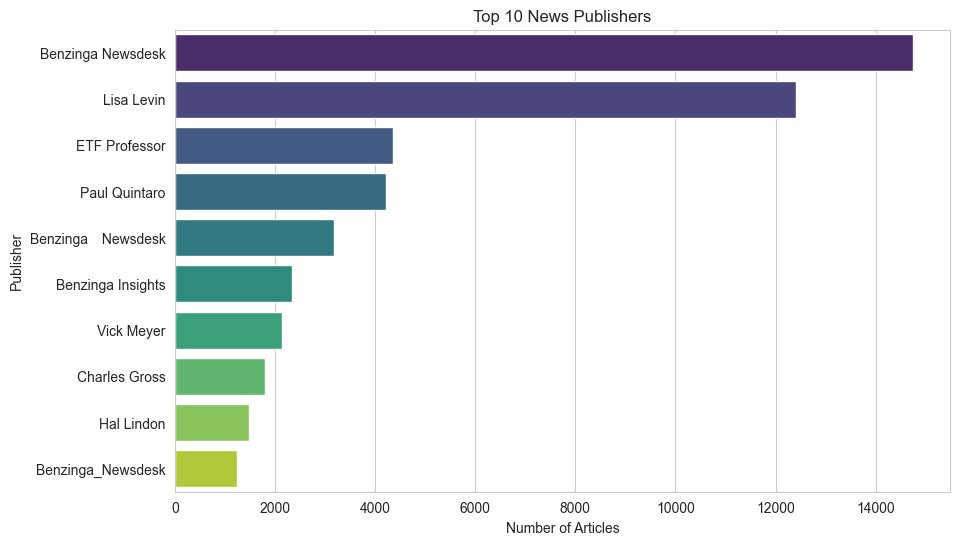

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='publisher',
            data=publisher_counts.head(10), palette='viridis')
plt.title('Top 10 News Publishers')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()

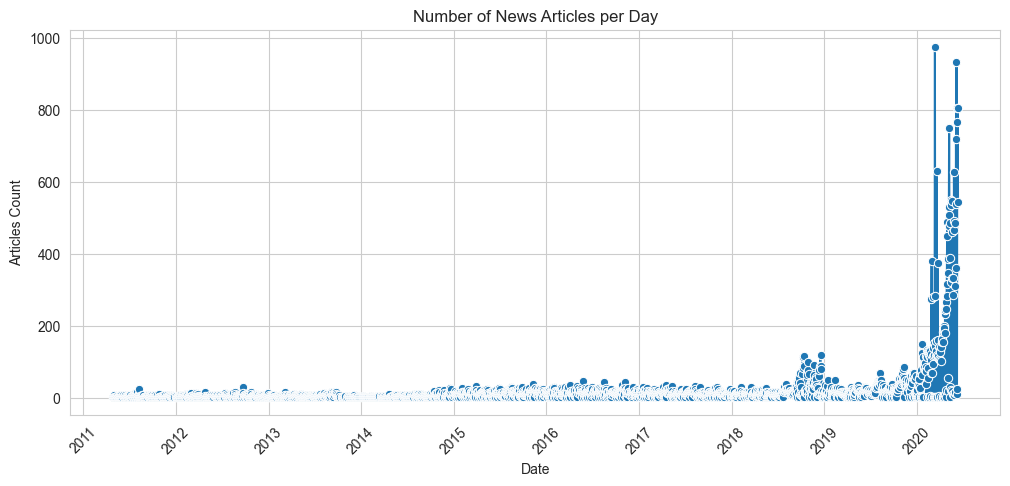

In [12]:
news_clean['date_only'] = news_clean['date'].dt.date
daily_counts = news_clean.groupby('date_only').size().reset_index(name='count')

plt.figure(figsize=(12, 5))
sns.lineplot(x='date_only', y='count', data=daily_counts, marker='o')
plt.title('Number of News Articles per Day')
plt.xlabel('Date')
plt.ylabel('Articles Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from collections import Counter
from itertools import chain

all_tokens = list(chain.from_iterable(news_clean['headline'].str.split()))
top_words = Counter(all_tokens).most_common(20)
top_words

[('stock', 14108),
 ('share', 9926),
 ('0', 9901),
 ('week', 9092),
 ('52', 8453),
 ('market', 6648),
 ('trading', 6575),
 ('company', 6031),
 ('hit', 5929),
 ('low', 5690),
 ('price', 5575),
 ('eps', 5531),
 ('target', 4695),
 ('several', 4650),
 ('sale', 4624),
 ('etf', 4511),
 ('lower', 4506),
 ('higher', 4271),
 ('estimate', 4090),
 ('u', 3536)]

C:\Users\user\AppData\Local\Temp\ipykernel_19584\3265088355.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_words_df, palette='viridis')


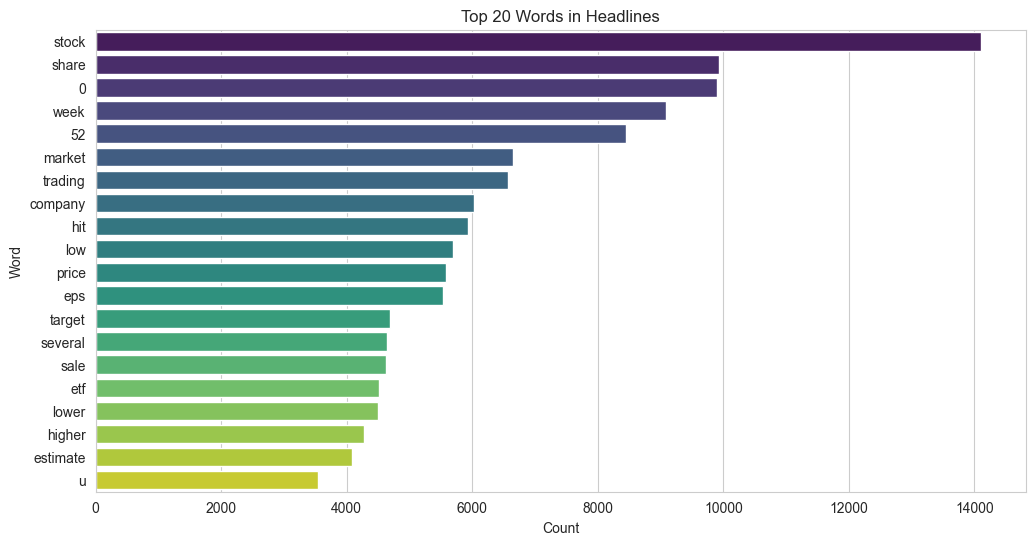

In [19]:
from collections import Counter
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten all headline words into a single list
all_tokens = list(chain.from_iterable(news_clean['headline'].str.split()))

# Count the top 20 most frequent words
top_words = Counter(all_tokens).most_common(20)

# Convert to DataFrame for plotting
top_words_df = pd.DataFrame(top_words, columns=['word', 'count'])

# Plot as a horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='word', data=top_words_df, palette='viridis')
plt.title('Top 20 Words in Headlines')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_19584\1703794372.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='domain',


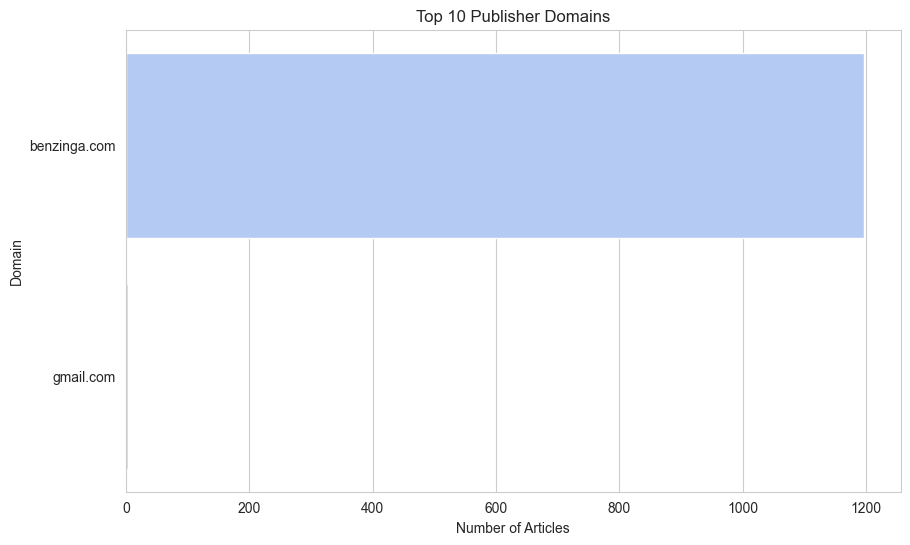

In [15]:
# Extract domain if publisher is an email
news_clean['publisher_domain'] = news_clean['publisher'].str.extract(
    r'@(\S+)$')

# Count the most frequent domains
domain_counts = news_clean['publisher_domain'].value_counts().reset_index()
domain_counts.columns = ['domain', 'count']
domain_counts.head(10)

# Plot top 10 domains
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='domain',
            data=domain_counts.head(10), palette='coolwarm')
plt.title('Top 10 Publisher Domains')
plt.xlabel('Number of Articles')
plt.ylabel('Domain')
plt.show()